In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [2]:
baseline_K_val = [1, 4, 8]
SUBJECT = "Harold"

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.TremorModelTrainer(config, subject=SUBJECT)
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_Harold/Baseline_results_train_with_{K}data_H2.csv')
# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/10 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
(8544, 4, 14, 1) (8544,) (86, 4, 14, 1) (86,)
Dataset 2/10 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 91.18%
Maximum validation accuracy : 94.19%
Accuracy of test dataset using model V0: 94.1860%
Dataset 3/10 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.5005%
Dataset 4/10 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 86.3731%
Dataset 5/10 - Session Exp_2025-07-11-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 86.6006%
Dataset 6/10 - Session Exp_2025-07-11-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 81.2116%
Dataset 7/10 - Session Exp_2025-07-16-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 82.3843%
Dataset 8/10 - Session Exp_2025-07-16-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 78.1111%
Dataset 9/10 - Session Exp_2025-07-17-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.9409%
Dataset

In [3]:
b_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce'
baseline_K = ['1', '4', '8']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_Harold/Baseline_results_train_with_{K}data_H2.csv')

In [ ]:
import Target

prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)


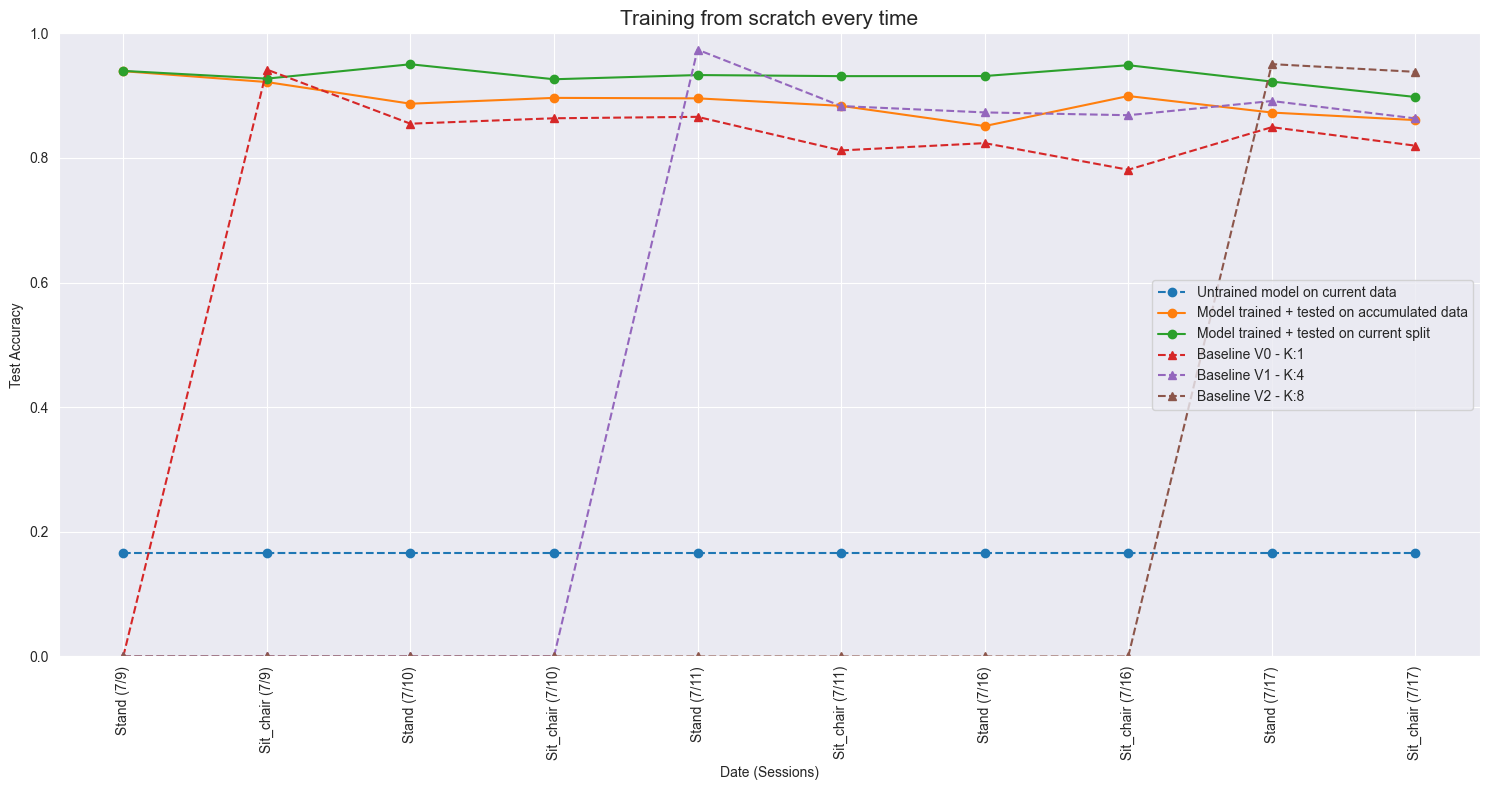

Average of acc without training anything (should be random): 20.33%
Average of acc using previous test data after training: 89.08%
Average of acc using current test data after training: 93.09%
K-1: 84.59% | Target: 92.99
K-4: 89.23% | Target: 92.75
K-8: 94.44% | Target: 91.02


In [5]:
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")